In [117]:
import sys
if "../.." not in sys.path: sys.path.insert(0, "../..")
if ".." not in sys.path: sys.path.insert(0, "..")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.transforms import blended_transform_factory
from tqdm.autonotebook import tqdm

from experiment.v1dd_em_client import V1DDEMClient
from analysis_tools import set_stylesheet
set_stylesheet()
%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
client = V1DDEMClient()

/opt/anaconda3/envs/v1dd/lib/python3.10/site-packages/standard_transform/datasets.py:21: UserWarning: Optimal rotation is not uniquely or poorly defined for the given sets of vectors.
  rot, _ = R.align_vectors(np.array([[0, 1, 0]]), [up])


Reference notebook: https://github.com/AllenInstitute/swdb_2022/blob/main/DynamicBrain/EM_reference_Materials/EM_Meshwork_Creation.ipynb

In [3]:
axo_proof = client.get_axon_proofreading_table()
den_proof = client.get_dendrite_proofreading_table()
axo_proof = axo_proof[axo_proof.cell_type.isin(V1DDEMClient.PROOFREADING_STATUS_COMPLETE)]
den_proof = den_proof[den_proof.cell_type.isin(V1DDEMClient.PROOFREADING_STATUS_COMPLETE)]

pd.merge(axo_proof, den_proof, how="inner", on="pt_root_id", suffixes=("__axo", "__den"))

,index__axo,id__axo,valid__axo,classification_system__axo,cell_type__axo,pt_supervoxel_id__axo,pt_root_id,pt_position__axo,index__den,id__den,valid__den,classification_system__den,cell_type__den,pt_supervoxel_id__den,pt_position__den
0,2,3,t,ariadne_axon_proofreading,accepted,91421987876227203,864691132806367265,"[85857, 68426, 9515]",408,2359,t,ariadne_dendrite_pf,allen_qa,91421712998210089,"[85966, 67383, 9409]"
1,3,4,t,ariadne_axon_proofreading,accepted,86492327157525518,864691133028846290,"[66650, 52945, 6945]",532,2365,t,ariadne_dendrite_pf,allen_qa,86491777401519134,"[66487, 50633, 6781]"
2,5,6,t,ariadne_axon_proofreading,ariadne_qa,94730486547008902,864691132616611290,"[98834, 73085, 5610]",502,2375,t,ariadne_dendrite_pf,allen_qa,94589199302814020,"[98421, 70793, 5564]"
3,7,8,t,ariadne_axon_proofreading,ariadne_qa,91838908337575741,864691132686850954,"[87580, 47143, 4900]",469,2389,t,ariadne_dendrite_pf,allen_qa,91980745337638949,"[87996, 51617, 4948]"
4,8,9,t,ariadne_axon_proofreading,accepted,88258280471811747,864691132653518844,"[73467, 79980, 8278]",492,2352,t,ariadne_dendrite_pf,allen_qa,88258417844086217,"[73539, 80463, 8145]"
5,9,10,t,ariadne_axon_proofreading,ariadne_qa,88110877194327876,864691132728010624,"[73026, 53222, 8351]",354,2368,t,ariadne_dendrite_pf,allen_qa,88251408524121765,"[73321, 52406, 8270]"
6,12,13,t,ariadne_axon_proofreading,ariadne_qa,95852812974099989,864691132760375604,"[103287, 58751, 5134]",1670,2397,t,ariadne_dendrite_pf,allen_qa,95782512949262887,"[103018, 59157, 5052]"


In [4]:
table = client.get_cell_type_table()
table = table[(table.axon_proofreading_status.isin(V1DDEMClient.PROOFREADING_STATUS_COMPLETE)) & (table.dendrite_proofreading_status.isin(V1DDEMClient.PROOFREADING_STATUS_COMPLETE))]
table.head()

,index,id,valid,target_id,classification_system,cell_type,id_ref,valid__ref,volume,pt_supervoxel_id,pt_root_id,pt_position,bb_start_position,bb_end_position,position_microns,axon_proofreading_status,dendrite_proofreading_status
809,809,819,t,265430,coarse_manual,BPC,265430,t,221.014158,91980814057135773,864691132686850954,"[793926, 465833, 223380]","[789968, 460556, 23615]","[797883, 470954, 24434]","[-113.85461191849143, 230.8467817383433, -321....",ariadne_qa,allen_qa
1616,1617,1314,t,351773,coarse_manual,PYC,351773,t,338.737007,95852812974037233,864691132760375604,"[929338, 528534, 228870]","[925225, 523800, 24182]","[933683, 533112, 25186]","[21.863739331515973, 292.05435805485354, -332....",ariadne_qa,allen_qa
2883,2887,217,t,294076,coarse_manual,PYC,294076,t,288.971677,94589268022183959,864691132616611290,"[885416, 641054, 246735]","[881148, 636863, 26054]","[889839, 645166, 27058]","[-21.494266946783174, 405.4674876682663, -345....",ariadne_qa,allen_qa


## Example mesh plot of L4 MC

Text(0.5, 1.0, 'Dendritic synapses for 864691132562619342')

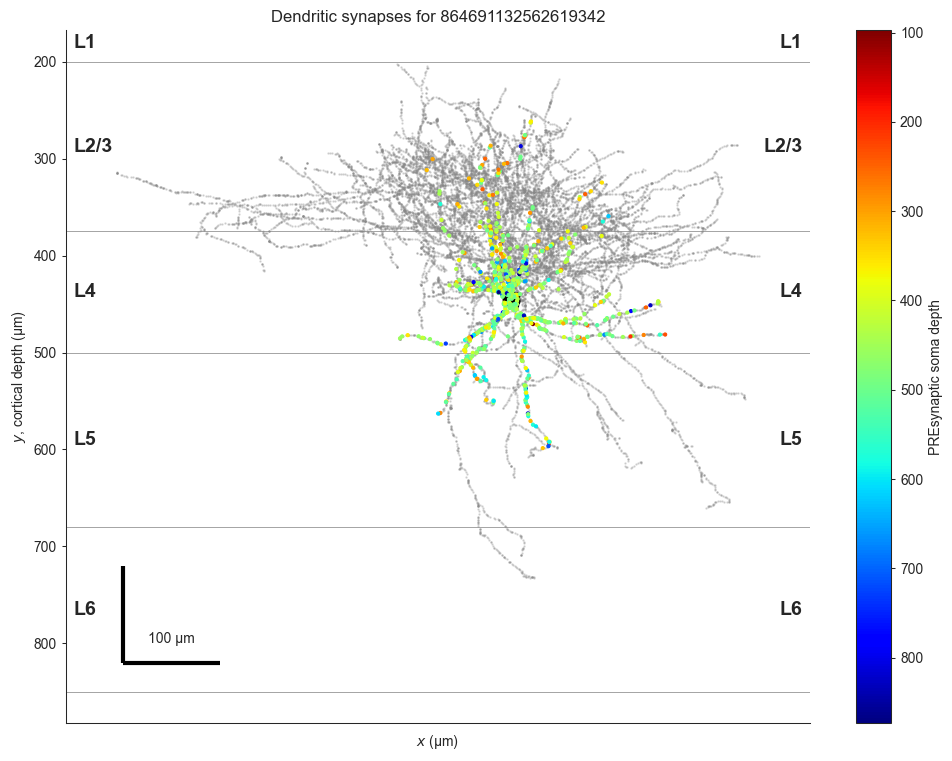

In [214]:
# Plot the mesh with microns transformation
fig, ax = plt.subplots(figsize=(12, 9))

ax.text(50, 800, "100 µm", ha="center", va="baseline")
ax.hlines(y=820, xmin=0, xmax=100, color="black", linewidth=3)
ax.vlines(x=0, ymin=720, ymax=820, color="black", linewidth=3)

# Custom synapse plotter
def dendritic_synapse_plotter(ax, neuron_mw, synapse_points):
    syn = mw.anno.post_syn # These are the dendritic synapses
    presyn_cells = syn.df.pre_pt_root_id.values
    n = len(presyn_cells)
    soma_pos_map = client.get_soma_position_microns_map(presyn_cells)

    # Compute soma to soma distances
    soma_pos = client.transform_position_to_microns(mw.skeleton.root_position)
    syn_colors = np.empty(n, dtype=float)
    for i, pre_root_id in enumerate(presyn_cells):
        if pre_root_id in soma_pos_map:
            pre_soma_pos = soma_pos_map[pre_root_id]

            # For plotting soma to soma distance
            # syn_colors[i] = np.linalg.norm(soma_pos - pre_soma_pos)

            # For plotting presyn soma depth
            syn_colors[i] = pre_soma_pos[1]
        else:
            syn_colors[i] = np.inf

    has_color = np.isfinite(syn_colors)

    # Plot synapses with presynaptic cells NOT in the volume
    # ax.scatter(synapse_points[~has_color, 0], synapse_points[~has_color, 1], s=0.5, color="purple", alpha=0.25, marker="o")

    # Plot synapses with presynaptic cell in volume
    scat = ax.scatter(synapse_points[has_color, 0], synapse_points[has_color, 1], s=5, c=syn_colors[has_color], alpha=1, cmap="jet_r") # hot_r
    cbar = ax.get_figure().colorbar(scat)
    cbar.ax.invert_yaxis()
    cbar.set_label("PREsynaptic soma depth")

root_id = 864691132562619342 # MC with proofread dendrites and a lot of 2P corresponded inputs
mw = client.get_neuron_meshwork(root_id)

client.plot_neuron_2d(
    mw,
    plot_type="mesh", ax=ax, color="#888", root_origin=(400, None),
    highlight_synapses="d",
    dendritic_synapse_plotter=dendritic_synapse_plotter
)

# Plot layer boundaries
for i in range(len(V1DDEMClient.LAYER_BOUNDARIES)):
    depth = V1DDEMClient.LAYER_BOUNDARIES[i]
    ax.axhline(depth, color="black", linewidth=0.5, alpha=0.5, zorder=-1)
    layer_text_y = depth-20 if i == 0 else (V1DDEMClient.LAYER_BOUNDARIES[i-1] + depth) / 2
    for text_x, ha in ((0.01, "left"), (0.99, "right")):
        ax.text(text_x, layer_text_y, f"L{V1DDEMClient.LAYER_NAMES[i]}", ha=ha, va="center", transform=blended_transform_factory(ax.transAxes, ax.transData), fontsize=14, fontweight="bold")

ax.invert_yaxis() # Open down
ax.set_xticks([])
ax.set_xlabel("$x$ (µm)")
ax.set_ylabel("$y$, cortical depth (µm)")
ax.axis("equal")
ax.set_title(f"Dendritic synapses for {root_id}")

# Load mesh data for all proofread Martinotti cells

In [116]:
table = client.get_cell_type_table()
table = table[(table.cell_type == "MC") & (table.dendrite_proofreading_status.isin(V1DDEMClient.PROOFREADING_STATUS_COMPLETE))]
table.sort_values(by="position_microns", ascending=True, key=lambda series: series.apply(lambda x: x[1]), inplace=True) # sort by depth
print(f"There are {len(table)} proofread MCs")
proof_mc_root_ids = table.pt_root_id.values
proof_mc_root_ids

There are 11 proofread MCs


array([864691132718050986, 864691132967182957, 864691133121058917,
       864691132823412073, 864691132669322924, 864691132562619342,
       864691132764109698, 864691132623694274, 864691132803126118,
       864691132851057470, 864691133121080421])

In [121]:
# Load the neuron meshworks
mc_neuron_mws = []
for root_id in tqdm(proof_mc_root_ids, desc="Loading meshworks"):
    mc_neuron_mws.append(client.get_neuron_meshwork(root_id))

Loading meshworks:   0%|          | 0/11 [00:00<?, ?it/s]

100%|██████████| 10137/10137 [00:00<00:00, 18670.75it/s]


### Dendritic synapse to soma distance: straight line vs. along dendrites

In [250]:
mw.mesh.vertices[8]

TrackedArray([478830.8, 551862.1, 228330. ])

In [251]:
mw.skeleton.vertices[5]

array([478830.8, 551862.1, 228330. ])

In [264]:
cell_types = client.get_cell_type_table()

3091


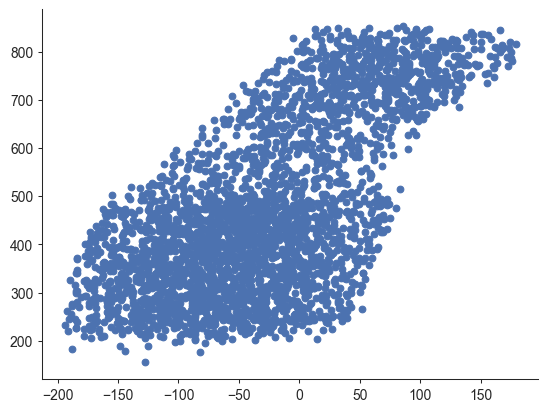

In [273]:
pycs = cell_types[cell_types.cell_type == "PYC"]
pyc_locs = np.vstack(pycs.position_microns)
plt.scatter(pyc_locs[:, 0], pyc_locs[:, 1])
print(len(pycs))

In [275]:
corresponded = client.get_2p_corresponded_table()
corresponded.head()

,index,id,valid,classification_system,cell_type,pt_supervoxel_id,pt_root_id,pt_position,roi_lookup,position_microns,axon_proofreading_status,dendrite_proofreading_status
0,0,90,t,session13,plane2_014,92055099945608124,864691132710145793,"[88274, 67650, 5900]",1-3-3-14,"[-112.57258685416217, 379.9149525558736, -318....",not_started,not_started
1,1,55,t,session13,plane0_roi_0060,93180175218572599,864691132760377194,"[92791, 64340, 5745]",1-3-1-60,"[-72.07225703497906, 349.1430176136275, -317.4...",not_started,not_started
2,2,43,t,session13,plane1_roi_0030,91843650048621008,864691132720617684,"[87483, 66110, 5411]",1-3-2-30,"[-119.78729184255074, 360.70596673244506, -336...",not_started,not_started
3,3,95,t,session13,plane4_0119,91070624654826905,864691132741334425,"[84428, 70297, 5418]",1-3-5-119,"[-147.1008040492488, 397.2344828991529, -345.9...",not_started,ariadne_qa
4,4,96,t,session13,plane1_0271,92547337557612090,864691132771662867,"[90300, 66348, 6009]",1-3-2-271,"[-94.38847650736024, 369.8469629730637, -310.8...",not_started,not_started


In [277]:
map(int, "1-3-3-14".split("-"))

In [279]:
corresponded.roi_lookup.values

array(['1-3-3-14', '1-3-1-60', '1-3-2-30', '1-3-5-119', '1-3-2-271',
       '1-3-3-269', '1-3-2-262', '1-3-3-158', '1-3-3-230', '1-3-1-88',
       '1-3-2-75', '1-3-4-14', '1-3-2-5', '1-3-3-83', '1-3-3-25',
       '1-3-3-74', '1-3-1-65', '1-3-4-89', '1-3-3-191', '1-3-3-139',
       '1-3-5-109', '1-3-1-40', '1-3-4-187', '1-3-1-117', '1-3-2-26',
       '1-3-4-306', '1-3-3-215', '1-3-3-29', '1-3-2-145', '1-3-3-4',
       '1-3-3-265', '1-3-1-209', '1-3-4-98', '1-3-1-671', '1-3-3-414',
       '1-3-3-300', '1-3-5-17', '1-3-4-387', '1-3-2-667', '1-3-3-237',
       '1-3-4-212', '1-3-5-419', '1-3-3-161', '1-3-3-294', '1-3-6-470',
       '1-3-1-67', '1-3-3-32', '1-3-3-250'], dtype=object)

0it [00:00, ?it/s]

  0%|          | 0/10982 [00:00<?, ?it/s]

  0%|          | 0/4398 [00:00<?, ?it/s]

  0%|          | 0/10091 [00:00<?, ?it/s]

  0%|          | 0/11343 [00:00<?, ?it/s]

  0%|          | 0/3609 [00:00<?, ?it/s]

  0%|          | 0/7881 [00:00<?, ?it/s]

  0%|          | 0/10482 [00:00<?, ?it/s]

  0%|          | 0/5403 [00:00<?, ?it/s]

  0%|          | 0/5674 [00:00<?, ?it/s]

  0%|          | 0/3323 [00:00<?, ?it/s]

  0%|          | 0/3285 [00:00<?, ?it/s]

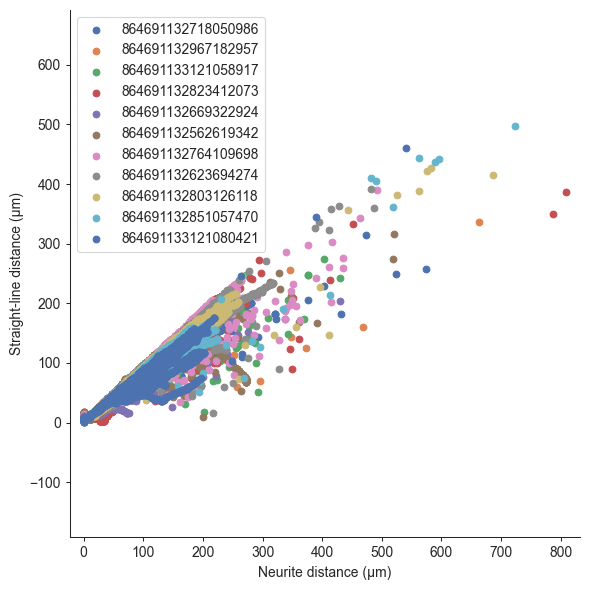

In [257]:
fig, ax = plt.subplots(figsize=(6, 6))

for root_id, mw in tqdm(zip(proof_mc_root_ids, mc_neuron_mws)):
    x = []
    y = []
    for syn_mesh_index in mw.anno.post_syn.data_original.post_pt_mesh_ind.values:
        neurite_dist = client.get_neurite_distance_to_root(mw, mesh_index=syn_mesh_index)
        straight_line_dist = np.linalg.norm(mw.mesh.vertices[syn_mesh_index] - mw.skeleton.root_position) / 1000
        x.append(neurite_dist)
        y.append(straight_line_dist)
    ax.scatter(x, y, label=root_id)

ax.legend()
ax.set_xlabel("Neurite distance (µm)")
ax.set_ylabel("Straight-line distance (µm)")
ax.axis("equal")
fig.tight_layout()

### Plot all the MCs side-by-side

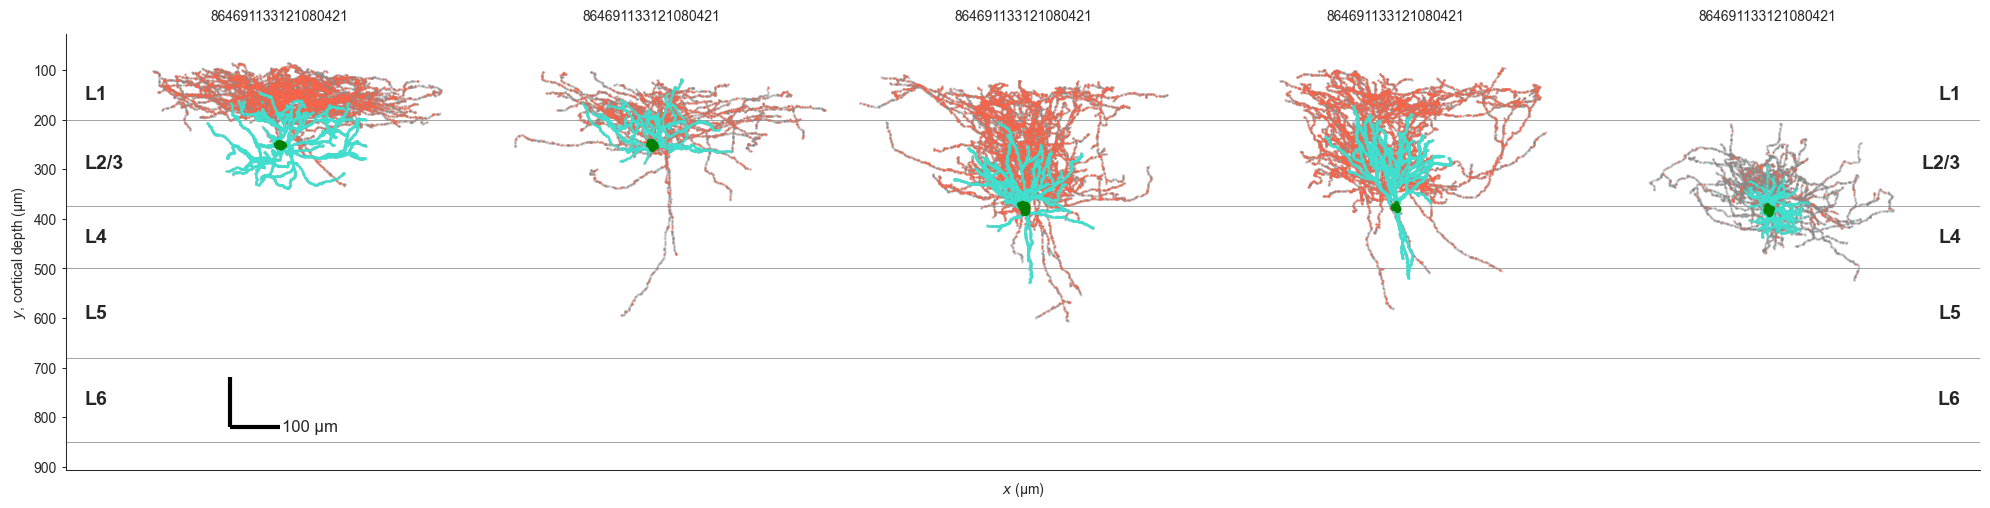

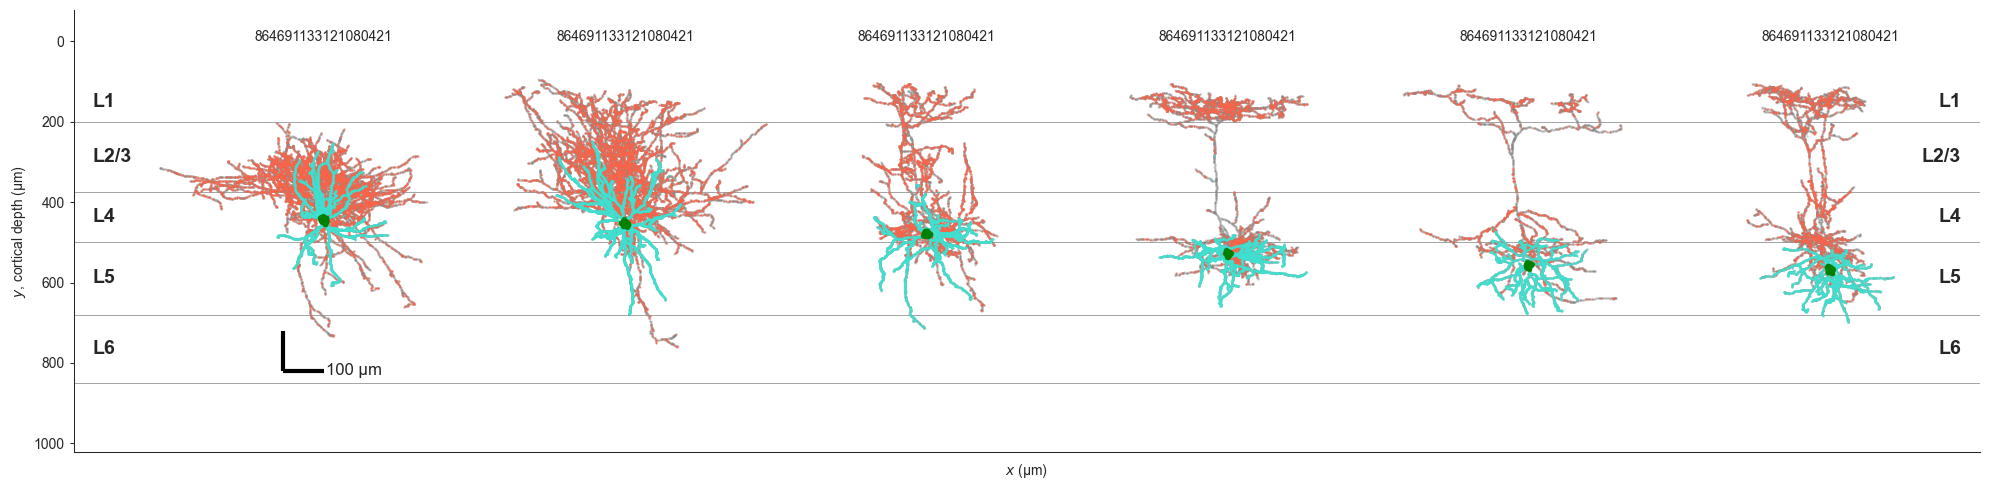

In [203]:
# Plot the mesh with microns transformation
for mc_neurons_mws_split in (mc_neuron_mws[:5], mc_neuron_mws[5:]):
    fig, ax = plt.subplots(figsize=(20, 5))

    ax.text(105, 820, "100 µm", ha="left", va="center", fontsize=12)
    ax.hlines(y=820, xmin=0, xmax=100, color="black", linewidth=3)
    ax.vlines(x=0, ymin=720, ymax=820, color="black", linewidth=3)

    root_origin_x = 100
    for mw in mc_neurons_mws_split:
        client.plot_neuron_2d(
            mw,
            plot_type="mesh", ax=ax, color="#888", root_origin=(root_origin_x, None),
            highlight_synapses="all",
        )
        ax.text(root_origin_x, 0, root_id, ha="center")
        root_origin_x += 750

    # Plot layer boundaries
    for i in range(len(V1DDEMClient.LAYER_BOUNDARIES)):
        depth = V1DDEMClient.LAYER_BOUNDARIES[i]
        ax.axhline(depth, color="black", linewidth=0.5, alpha=0.5, zorder=-1)
        layer_text_y = depth-50 if i == 0 else (V1DDEMClient.LAYER_BOUNDARIES[i-1] + depth) / 2
        for text_x, ha in ((0.01, "left"), (0.99, "right")):
            ax.text(text_x, layer_text_y, f"L{V1DDEMClient.LAYER_NAMES[i]}", ha=ha, va="center", transform=blended_transform_factory(ax.transAxes, ax.transData), fontsize=14, fontweight="bold")

    ax.invert_yaxis() # Open down
    ax.set_xticks([])
    ax.set_xlabel("$x$ (µm)")
    ax.set_ylabel("$y$, cortical depth (µm)")
    ax.axis("equal")
    # ax.set_title(f"Dendritic synapses for {root_id}")
    fig.tight_layout()

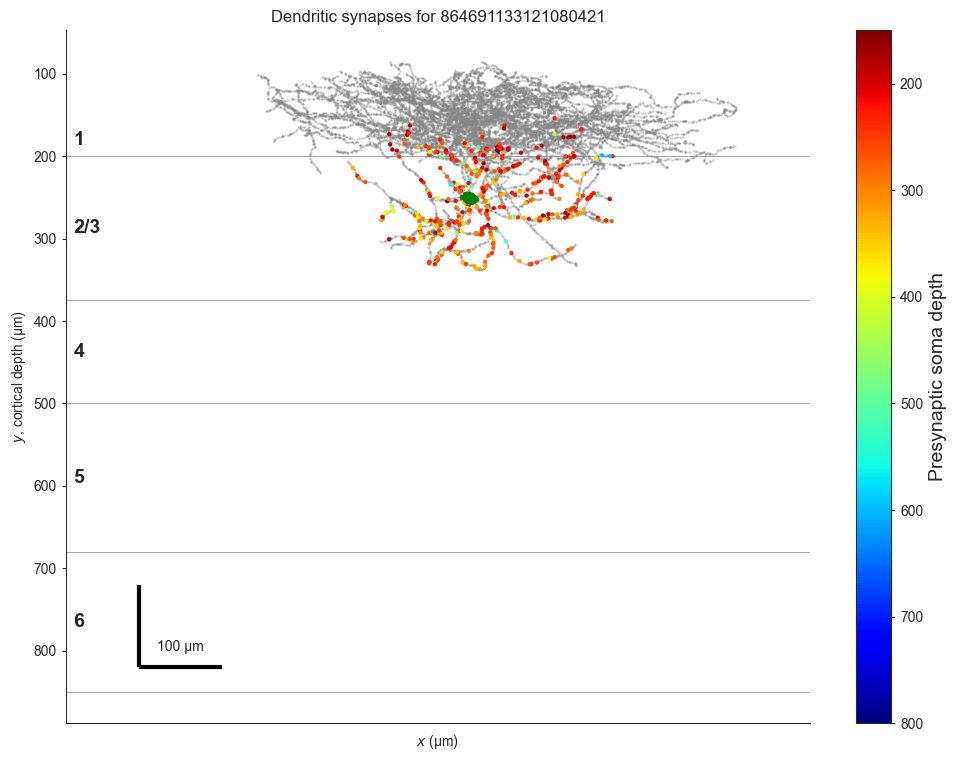

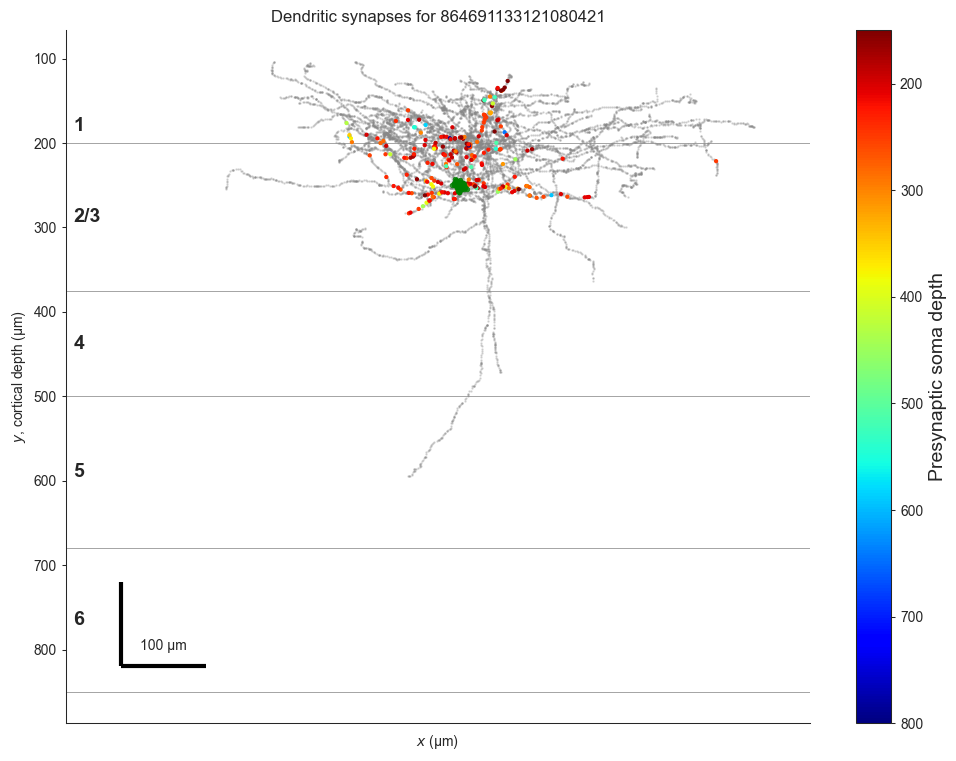

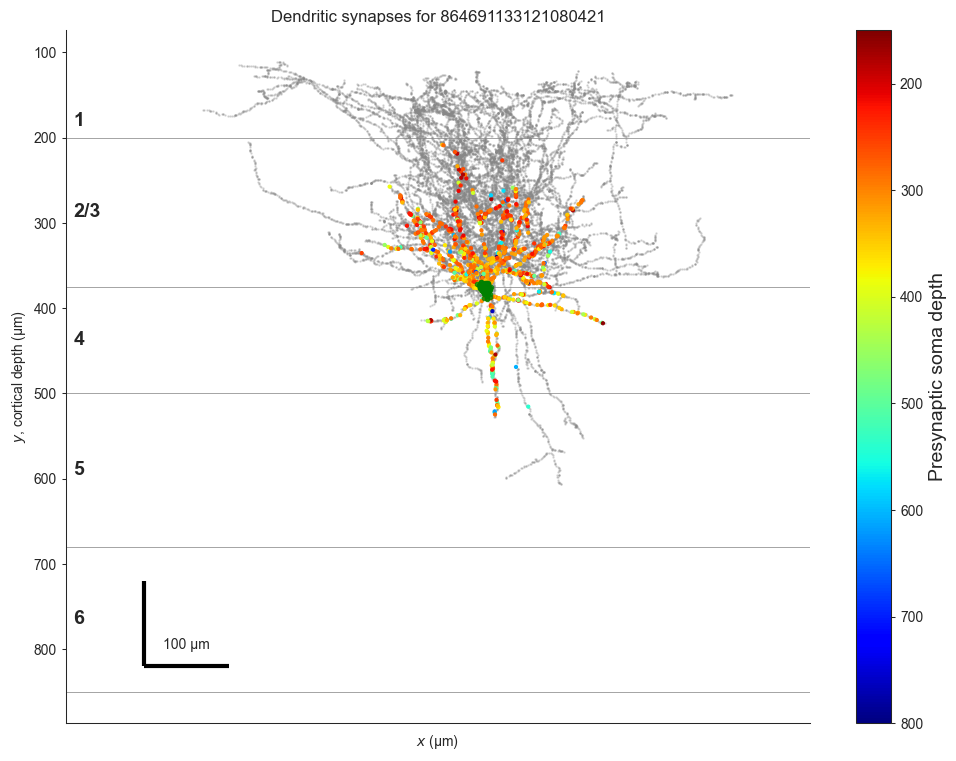

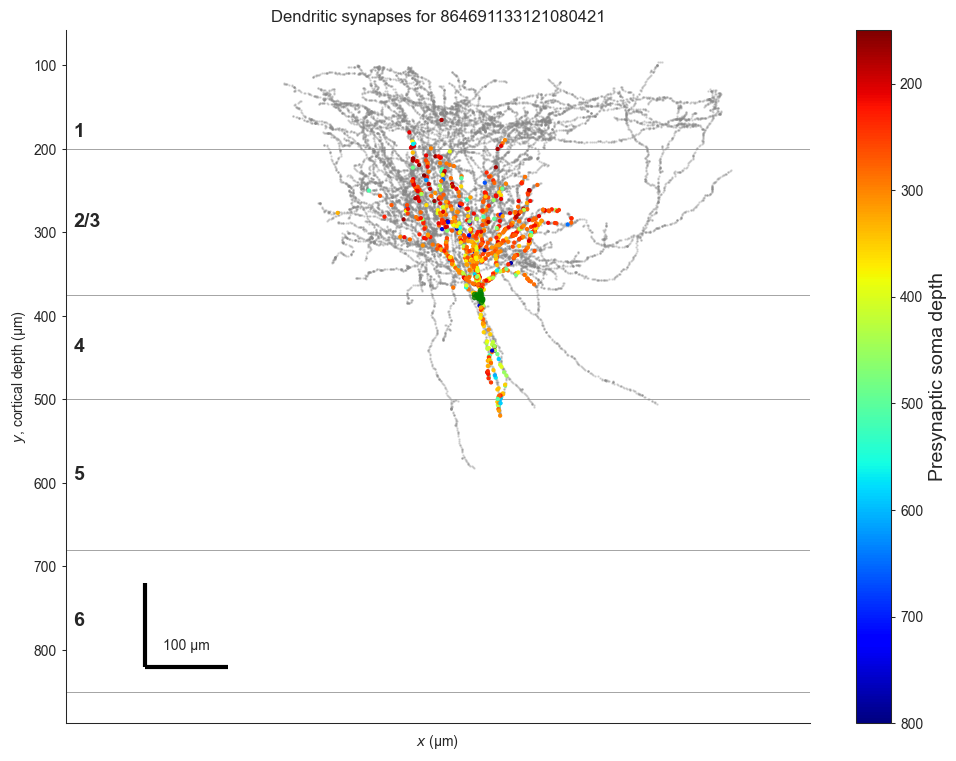

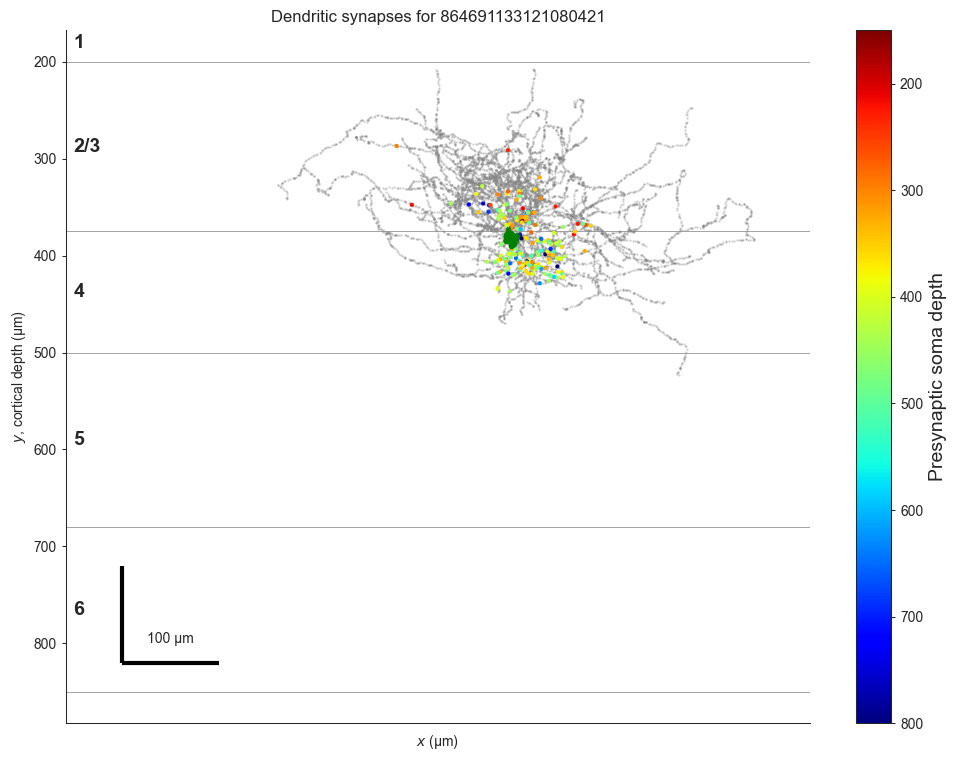

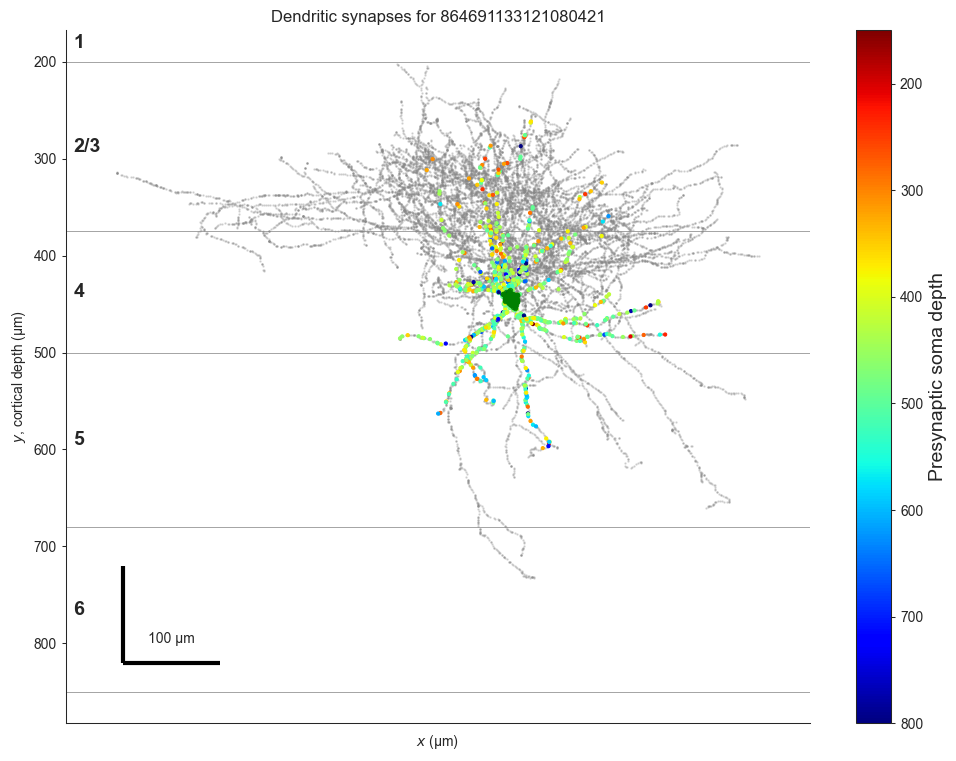

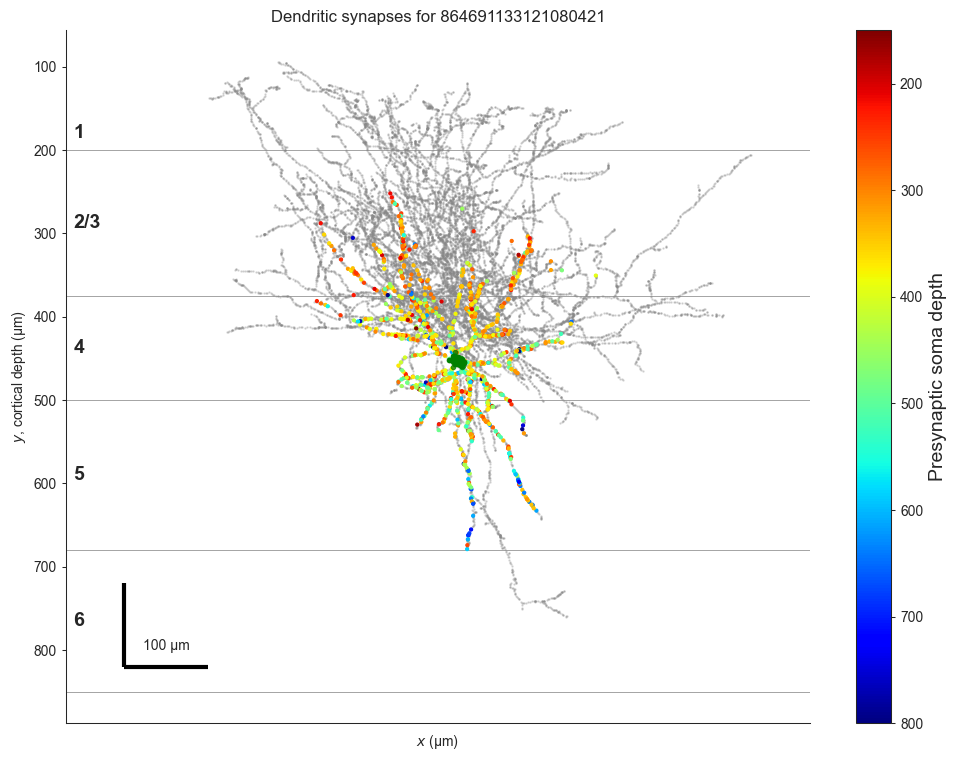

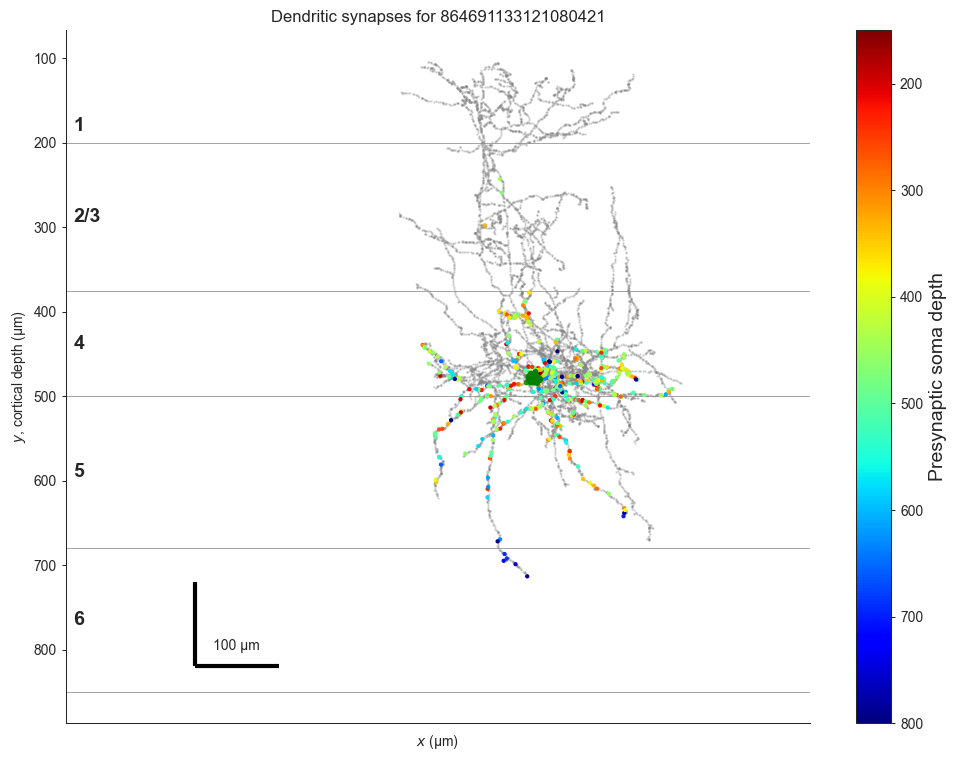

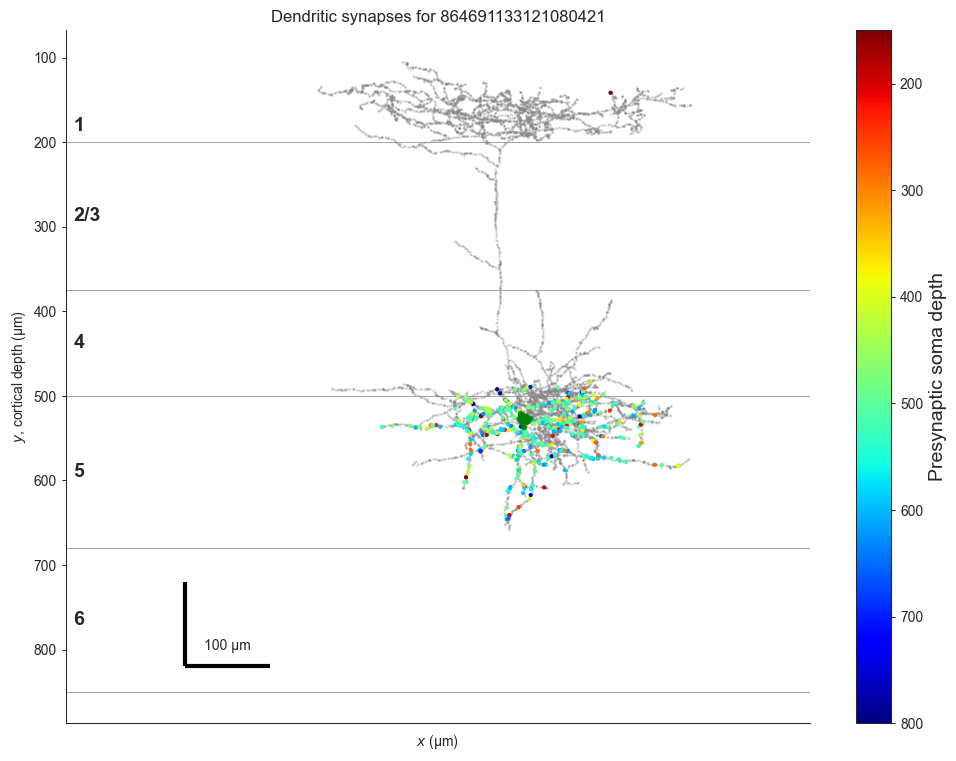

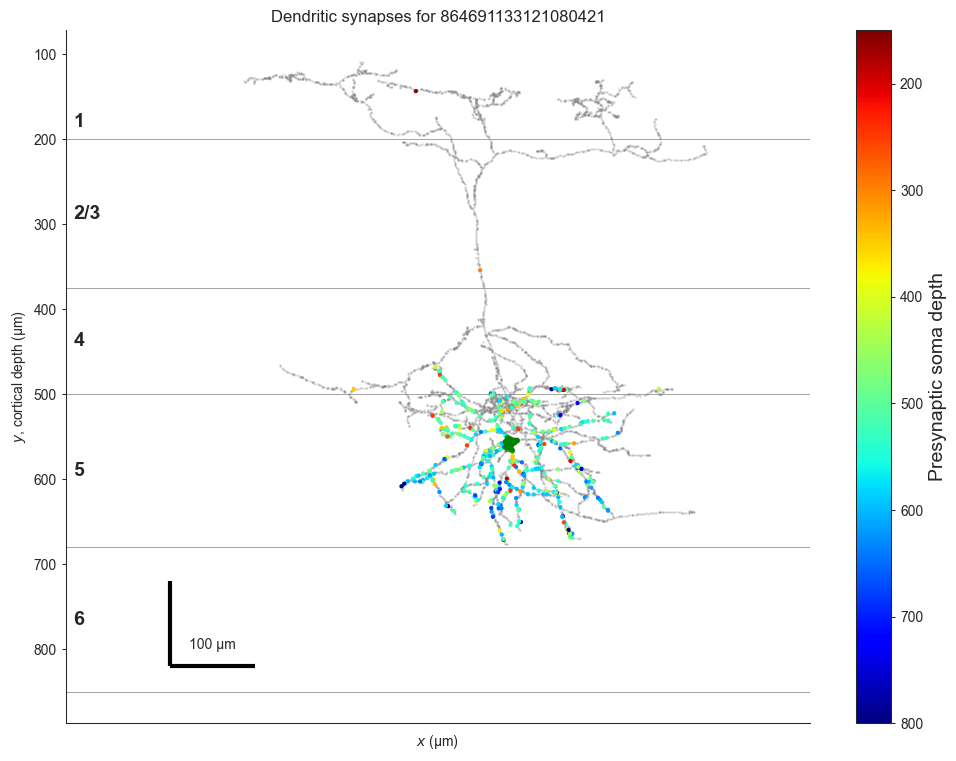

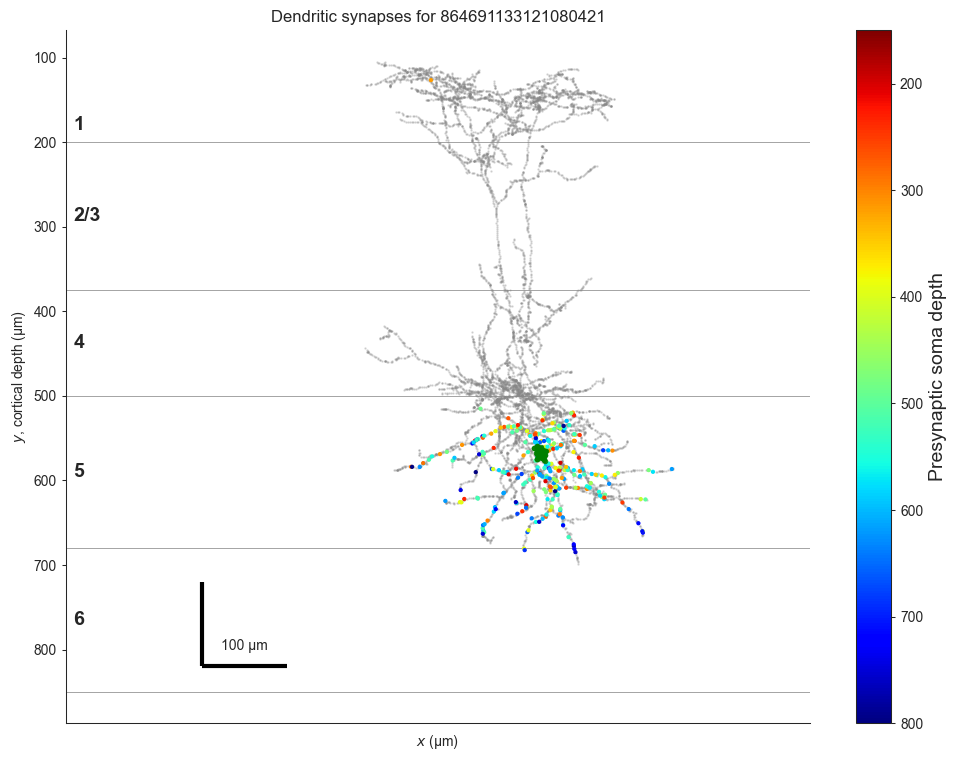

In [201]:
# Plot the mesh with microns transformation
for mw in mc_neuron_mws:
    fig, ax = plt.subplots(figsize=(12, 9))

    ax.text(50, 800, "100 µm", ha="center", va="baseline")
    ax.hlines(y=820, xmin=0, xmax=100, color="black", linewidth=3)
    ax.vlines(x=0, ymin=720, ymax=820, color="black", linewidth=3)

    # Custom synapse plotter
    def dendritic_synapse_plotter(ax, neuron_mw, synapse_points):
        syn = mw.anno.post_syn # These are the dendritic synapses
        presyn_cells = syn.df.pre_pt_root_id.values
        n = len(presyn_cells)
        soma_pos_map = client.get_soma_position_microns_map(presyn_cells)

        # Compute soma to soma distances
        soma_pos = client.transform_position_to_microns(mw.skeleton.root_position)
        syn_colors = np.empty(n, dtype=float)
        for i, pre_root_id in enumerate(presyn_cells):
            if pre_root_id in soma_pos_map:
                pre_soma_pos = soma_pos_map[pre_root_id]

                # For plotting soma to soma distance
                # syn_colors[i] = np.linalg.norm(soma_pos - pre_soma_pos)

                # For plotting presyn soma depth
                syn_colors[i] = pre_soma_pos[1]
            else:
                syn_colors[i] = np.inf

        has_color = np.isfinite(syn_colors)

        # Plot synapses with presynaptic cells NOT in the volume
        # ax.scatter(synapse_points[~has_color, 0], synapse_points[~has_color, 1], s=0.5, color="purple", alpha=0.25, marker="o")

        # Plot synapses with presynaptic cell in volume
        scat = ax.scatter(synapse_points[has_color, 0], synapse_points[has_color, 1], s=5, c=syn_colors[has_color], alpha=1, cmap="jet_r", vmin=150, vmax=800) # hot_r
        cbar = ax.get_figure().colorbar(scat)
        cbar.ax.invert_yaxis()
        cbar.set_label("PREsynaptic soma depth", fontsize=14)

    # Custom synapse plotter
    def axonal_synapse_plotter(ax, neuron_mw, synapse_points):
        syn = mw.anno.pre_syn # These are the axonal synapses
        postsyn_cells = syn.df.post_pt_root_id.values
        n = len(postsyn_cells)
        soma_pos_map = client.get_soma_position_microns_map(postsyn_cells)

        # Compute soma to soma distances
        soma_pos = client.transform_position_to_microns(mw.skeleton.root_position)
        syn_colors = np.empty(n, dtype=float)
        for i, pre_root_id in enumerate(postsyn_cells):
            if pre_root_id in soma_pos_map:
                pre_soma_pos = soma_pos_map[pre_root_id]

                # For plotting soma to soma distance
                # syn_colors[i] = np.linalg.norm(soma_pos - pre_soma_pos)

                # For plotting presyn soma depth
                syn_colors[i] = pre_soma_pos[1]
            else:
                syn_colors[i] = np.inf

        has_color = np.isfinite(syn_colors)

        # Plot synapses with presynaptic cells NOT in the volume
        # ax.scatter(synapse_points[~has_color, 0], synapse_points[~has_color, 1], s=0.5, color="purple", alpha=0.25, marker="o")

        # Plot synapses with presynaptic cell in volume
        scat = ax.scatter(synapse_points[has_color, 0], synapse_points[has_color, 1], s=5, c=syn_colors[has_color], alpha=1, cmap="jet_r", vmin=150, vmax=800) # hot_r
        cbar = ax.get_figure().colorbar(scat)
        cbar.ax.invert_yaxis()
        cbar.set_label("POSTsynaptic soma depth", fontsize=14)


    client.plot_neuron_2d(
        mw,
        plot_type="mesh", ax=ax, color="#888", root_origin=(400, None),
        highlight_synapses="d",
        dendritic_synapse_plotter=dendritic_synapse_plotter
    )

    # Plot layer boundaries
    for i in range(len(V1DDEMClient.LAYER_BOUNDARIES)):
        depth = V1DDEMClient.LAYER_BOUNDARIES[i]
        ax.axhline(depth, color="black", linewidth=0.5, alpha=0.5, zorder=-1)
        layer_text_y = depth-20 if i == 0 else (V1DDEMClient.LAYER_BOUNDARIES[i-1] + depth) / 2
        ax.text(0.01, layer_text_y, V1DDEMClient.LAYER_NAMES[i], ha="left", va="center", transform=blended_transform_factory(ax.transAxes, ax.transData), fontsize=14, fontweight="bold")

    ax.invert_yaxis() # Open down
    ax.set_xticks([])
    ax.set_xlabel("$x$ (µm)")
    ax.set_ylabel("$y$, cortical depth (µm)")
    ax.axis("equal")
    ax.set_title(f"Dendritic synapses for {root_id}")